# Final Project


## Load the dataset.

In [1]:
#importing packages
import numpy as np          
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Mobile dataset.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Removing Outliers

In [4]:
data.shape

(2000, 21)

In [5]:
#removing outliers
outlier = ['fc','px_height']
l = len(outlier)
for i in range(l):
    q1 = data[outlier[i]].quantile(0.25)
    q3 = data[outlier[i]].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data = data.loc[(data[outlier[i]] > fence_low) & (data[outlier[i]] < fence_high)]


In [6]:
data.shape

(1956, 21)

## Model making

## 1. Multiple Linear Regression

In [7]:
# Dependent variables and independent variable
x = data.iloc[:,:-1]
y = data.iloc[:,-1].values# .values method puts every values in numpy array

In [8]:
# splitting the dataset into trainnig and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
# Building a multiple linear regression model.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Predicting the test results
y_pred = regressor.predict(x_test)

In [11]:
# Calculating error
y_test - y_pred        

array([-1.82226582e-01,  2.36002090e-01, -2.33322732e-03,  3.92901104e-01,
       -4.94741270e-01, -4.23699248e-01,  5.84557878e-01,  5.07107068e-01,
        6.18658892e-01,  3.03336930e-01,  3.39867950e-01, -2.84299008e-01,
       -5.93228047e-01, -1.61530659e-01, -1.80554159e-01, -2.56598948e-01,
       -1.74960464e-01, -3.08208514e-01,  5.88101579e-01,  2.45079222e-01,
       -1.50115511e-01, -3.00582089e-01,  3.87904622e-01, -3.24648629e-01,
       -2.29602325e-01, -3.93845117e-01,  5.82030822e-01,  3.72025879e-01,
       -4.43791721e-01, -9.45940390e-02, -4.79609103e-01, -5.53594390e-01,
        4.43957928e-01, -2.42197717e-01,  4.72579091e-01,  1.71963887e-01,
       -5.44581522e-01,  1.64234350e-01, -1.08434586e-02,  4.90503460e-01,
       -3.03682179e-01, -2.84817038e-01, -1.44593412e-01, -5.23775341e-01,
        1.21181974e-01,  1.11804664e-01,  1.25349948e-01,  5.46226225e-01,
        2.23369133e-01, -5.03749816e-04,  3.43468343e-01, -2.08464462e-01,
        5.52050763e-01, -

In [12]:
# accuracy metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2score = r2_score(y_test, y_pred)
print (rmse)
print (r2score) 

0.3151558256000706
0.9187301351670333


In [13]:
y_train

array([0, 0, 0, ..., 2, 0, 3], dtype=int64)

In [14]:
y_pred

array([ 1.18222658,  1.76399791,  3.00233323,  1.6070989 ,  1.49474127,
        3.42369925,  2.41544212,  2.49289293,  2.38134111,  2.69666307,
        1.66013205,  1.28429901,  0.59322805,  0.16153066,  1.18055416,
        3.25659895,  2.17496046,  0.30820851,  2.41189842,  0.75492078,
        3.15011551,  3.30058209,  1.61209538,  1.32464863,  0.22960232,
        0.39384512,  2.41796918,  0.62797412,  2.44379172,  2.09459404,
        1.4796091 ,  0.55359439,  2.55604207,  1.24219772,  1.52742091,
        2.82803611,  0.54458152,  0.83576565,  2.01084346,  2.50949654,
        1.30368218,  0.28481704,  1.14459341,  0.52377534, -0.12118197,
        1.88819534, -0.12534995,  2.45377377,  1.77663087,  2.00050375,
        0.65653166,  3.20846446,  1.44794924,  1.21991235, -0.55278994,
        1.65527377,  2.50970362,  1.44968166,  1.28431825,  2.28728722,
        2.22301753,  2.44750586,  1.9888399 ,  3.04459687,  0.26854233,
        0.95129027,  2.48306995,  0.19297509,  2.48476348,  1.86

In [15]:

regressor.score(x_test, y_test)

0.9187301351670333

In [16]:
regressor.intercept_

-1.5505248233012559

In [17]:
regressor.coef_

array([ 0.00049931,  0.00359053, -0.02110877, -0.02309198,  0.00289456,
       -0.00633636,  0.00077319, -0.02006512, -0.0007249 ,  0.00206144,
       -0.0010583 ,  0.00029328,  0.00027023,  0.00093881,  0.00042917,
        0.00130964,  0.00064674,  0.02176596,  0.01043247, -0.03043664])

In [18]:
# Comparison of actual vs predicted values
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
df

,Actual,Predicted
0,1,1.182227
1,2,1.763998
2,3,3.002333
3,2,1.607099
4,1,1.494741
...,...,...
387,3,2.698143
388,0,0.367717
389,0,-0.020253
390,0,-0.093517


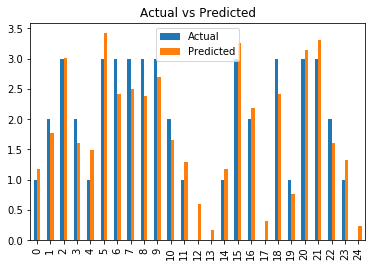

In [19]:
# plotting actual vs predicted
df1 = df.head(25)
df1.plot(kind = 'bar')
plt.title('Actual vs Predicted')
plt.show()

## 2. Logistic Regression

In [20]:
# Dependent variables and independent variable
x1 = data.iloc[:,:-1].values
y1 = data.iloc[:,-1].values           # .values method puts every values in numpy array

In [21]:
# splitting the dataset into trainnig and test set.
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [22]:
# Building a logistic regression model.
from sklearn.linear_model import LogisticRegression
lregressor = LogisticRegression()
lregressor.fit(x1_train, y1_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Predicting the test results
y1_pred = lregressor.predict(x1_test)

In [24]:
# Calculating error
y1_test - y1_pred    

array([ 0,  1,  0,  0, -2,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  1,
        0,  0,  0,  1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,
        1,  0, -1,  0,  0,  0,  1, -1,  0, -2,  0, -1,  0,  0,  0,  0,  1,
        0,  1,  0,  0,  0,  1, -1,  0, -1,  0,  1,  1,  0,  0, -1,  0, -1,
        1,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1,  0,  0, -1,  0,  0, -1,
        0, -1,  0,  0,  1,  0,  0, -1,  0,  0,  0, -1,  1, -1, -1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  1,  0,  0,  1, -1,
       -2,  0,  1,  0,  0,  0,  0,  1,  0, -1,  0, -1,  0,  1,  0,  0, -1,
        0,  0,  0, -1,  0,  1, -1,  0,  0,  1, -1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  1, -1, -1, -2,  1, -2,  0,  0,  0,  0, -2, -1,  1,
        0,  0, -1,  1,  0,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  1,  1,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  1,  0,  0,  1

In [25]:
# accuracy metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse1 = np.sqrt(mean_squared_error(y1_test, y1_pred))
r2score1 = r2_score(y1_test, y1_pred)
print (rmse1)
print (r2score1) 

0.6507452556531642
0.6535018823316419


In [48]:
# evaluate the score of model.
ac1 = accuracy_score(y1_test, y1_pred)
ac1

0.6377551020408163

In [28]:
lregressor.intercept_

array([ 6.44052071e-04,  1.64109879e-04, -6.05448263e-05, -7.47617124e-04])

In [29]:
lregressor.coef_

array([[-5.31544481e-04,  3.17939974e-04,  1.17827396e-03,
         3.45947239e-04,  1.59025710e-03,  3.07953322e-04,
         1.67059881e-02,  2.69213005e-04,  4.36645683e-02,
         3.50307968e-03,  5.41437151e-03, -2.10379286e-03,
         1.35759133e-03, -4.34660618e-03,  8.47323732e-03,
         3.64865245e-03,  5.30729090e-03,  4.70931746e-04,
         3.33176128e-04,  4.26466208e-04],
       [ 1.37747287e-04,  3.19303725e-05,  1.49278810e-04,
         1.94026887e-04,  2.29383648e-04,  1.58828256e-04,
         5.04606687e-03,  1.56981208e-04,  8.31873250e-03,
        -3.75723184e-04,  6.42442330e-04, -1.33484003e-04,
         5.00857298e-04, -4.06963747e-04,  1.90773823e-03,
         4.42613388e-04,  3.88698600e-03,  1.24416709e-04,
         1.99476749e-04,  1.09711600e-04],
       [ 1.92381130e-04, -3.74824658e-05, -3.13853000e-04,
        -1.84778545e-04,  1.26818091e-03, -2.30394054e-04,
        -7.34179494e-03, -1.09455650e-04, -1.09912092e-02,
         5.35949690e-04, -3.6

In [30]:
# Comparison of actual vs predicted values
df2 = pd.DataFrame({'Actual':y1_test.flatten(), 'Predicted':y1_pred.flatten()})
df2

,Actual,Predicted
0,1,1
1,2,1
2,3,3
3,2,2
4,1,3
...,...,...
387,3,3
388,0,1
389,0,0
390,0,0


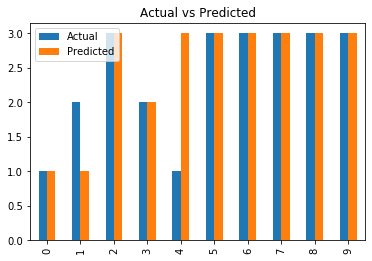

In [47]:
df3 = df2.head(10)
df3.plot(kind = 'bar')
plt.title('Actual vs Predicted')
plt.show()

In [32]:
a = np.array([rmse, r2score])
b = np.array([rmse1, r2score1])
df4 = pd.DataFrame({'Multiple Regression':a.flatten(),'Logistic Regression':b.flatten()},index = ['RMSE','Rsquare'])
df4

,Multiple Regression,Logistic Regression
RMSE,0.315156,0.650745
Rsquare,0.918730,0.653502


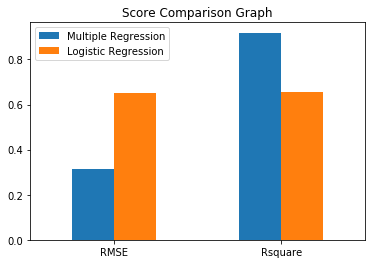

In [33]:
df4.plot(kind = 'bar')
plt.title('Score Comparison Graph')
plt.xticks(rotation = 0)
plt.show()

## 3. Decision Tree

In [34]:
# Dependent variables and independent variable
x2 = data.iloc[:,:-1].values
y2 = data.iloc[:,-1].values           # .values method puts every values in numpy array

In [35]:
# splitting the dataset into trainnig and test set.
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [37]:
# Building a decision tree model model.
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
x2_train

array([[5.550e+02, 1.000e+00, 5.000e-01, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [9.340e+02, 0.000e+00, 1.100e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.431e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.219e+03, 0.000e+00, 1.600e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.195e+03, 0.000e+00, 2.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [1.358e+03, 0.000e+00, 2.500e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [43]:
y2_pred = dtree.predict(x2_test)
y2_pred

array([1, 2, 3, 1, 1, 3, 2, 3, 2, 3, 2, 1, 0, 0, 1, 3, 3, 0, 3, 1, 3, 3,
       1, 1, 0, 0, 3, 0, 2, 2, 1, 1, 2, 1, 1, 3, 0, 1, 2, 2, 2, 0, 1, 1,
       0, 2, 0, 3, 2, 2, 1, 3, 2, 1, 0, 2, 3, 1, 1, 2, 2, 3, 2, 3, 0, 1,
       3, 0, 3, 2, 1, 2, 2, 2, 2, 2, 1, 3, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 3, 3, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 3, 2, 0, 3, 3, 3, 2,
       2, 3, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 2, 0, 3, 1, 0, 2, 2,
       3, 3, 3, 1, 3, 3, 1, 2, 3, 0, 0, 3, 1, 2, 2, 0, 3, 2, 3, 2, 0, 1,
       0, 2, 1, 3, 1, 2, 1, 2, 1, 0, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2,
       2, 3, 0, 0, 1, 3, 0, 2, 1, 2, 3, 2, 0, 3, 1, 3, 3, 2, 1, 0, 0, 2,
       3, 1, 1, 3, 1, 0, 3, 0, 0, 3, 2, 1, 2, 1, 0, 3, 1, 0, 2, 1, 0, 0,
       1, 2, 3, 1, 0, 3, 0, 0, 2, 0, 1, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 2,
       0, 3, 3, 3, 0, 1, 1, 0, 2, 2, 0, 0, 0, 2, 1, 1, 1, 3, 0, 3, 3, 1,
       3, 0, 1, 1, 1, 3, 3, 1, 2, 3, 1, 3, 0, 0, 3, 2, 1, 1, 3, 1, 1, 2,
       1, 2, 0, 2, 0, 1, 0, 3, 1, 0, 3, 2, 0, 3, 0,

In [40]:
y2_test - y2_pred

array([ 0,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  1,  0,
        1,  0,  0,  0,  0,  1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  0,
        0,  0,  1,  0,  0,  0,  0, -1,  0,  1,  0,  0,  1,  0,  0,  1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  1,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  1,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  2,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0

In [50]:
# evaluate the score of model.
ac2 = accuracy_score(y2_test, y2_pred)
ac2

0.8290816326530612

In [45]:
# Comparison of actual vs predicted values
df5 = pd.DataFrame({'Actual':y2_test.flatten(), 'Predicted':y2_pred.flatten()})
df5

,Actual,Predicted
0,1,1
1,2,2
2,3,3
3,2,1
4,1,1
...,...,...
387,3,3
388,0,0
389,0,0
390,0,0


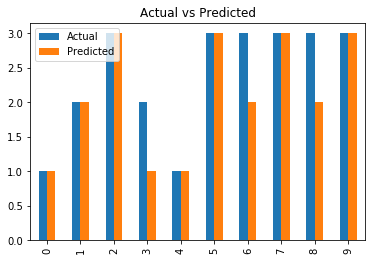

In [46]:
df6 = df5.head(10)
df6.plot(kind = 'bar')
plt.title('Actual vs Predicted')
plt.show()

In [54]:
# plotting the graph for comparison if score between logistic regression and decision tree
df7 = pd.DataFrame({'Logistic Regression':ac1 , 'Decision Tree':ac2}, index = ['Accuracy'])
df7

,Logistic Regression,Decision Tree
Accuracy,0.637755,0.829082


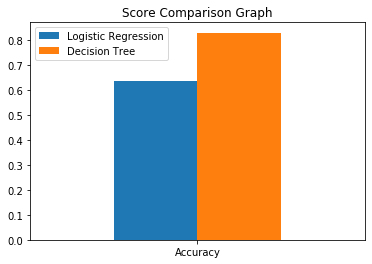

In [55]:
df7.plot(kind = 'bar')
plt.title('Score Comparison Graph')
plt.xticks(rotation = 0)
plt.show()

In [82]:
# Checking model on demo input from user.
demo = np.array([[2000,1,2.2,1,5,1,64,0.5,145,8,13,1280,720,3072,12,6,20,1,1,1]])
demo_pred = dtree.predict(demo)
demo_pred

array([3], dtype=int64)